In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

Usage  Timestep  InventoryCode Domain
0     93         1              0      B
1     94         2              0      B
2     94         3              0      B
3     94         4              0      B
4     94         5              0      B

In [4]:
domA = pd.DataFrame(df.loc[df['Domain'] == 'A'])
domB = pd.DataFrame(df.loc[df['Domain'] == 'B'])
domCi = pd.DataFrame(df.loc[df['Domain'] == 'C[i]'])
domCii = pd.DataFrame(df.loc[df['Domain'] == 'C[ii]'])

In [5]:
print(domA.shape)
print(domB.shape)
print(domCi.shape)
print(domCii.shape)

(30000, 4)
(23500, 4)
(4200, 4)
(4200, 4)


In [6]:
nAB = 250
nC = 100

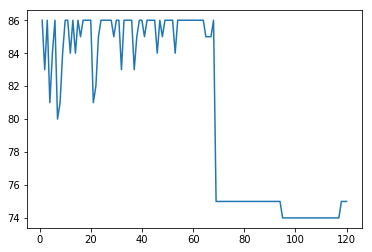

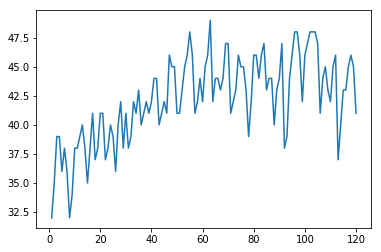

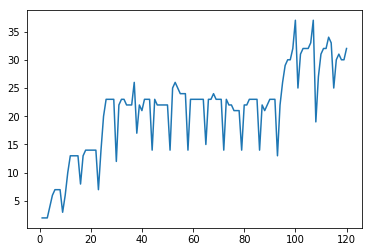

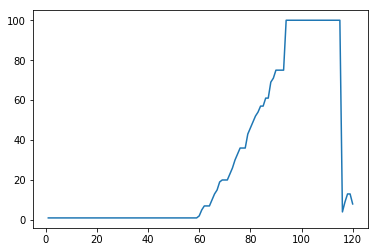

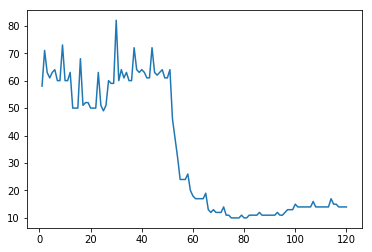

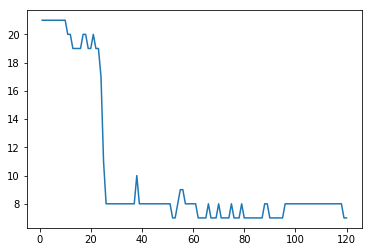

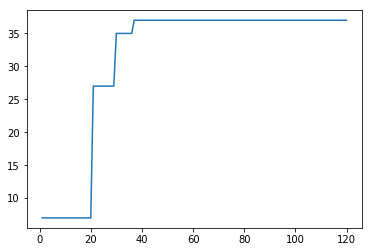

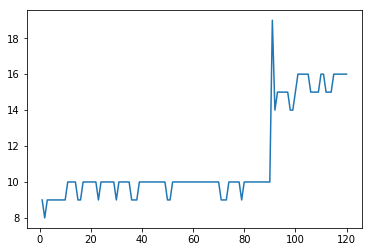

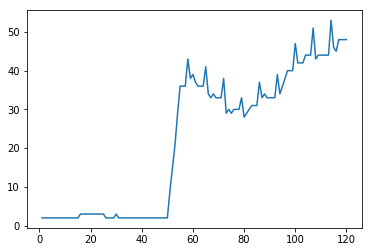

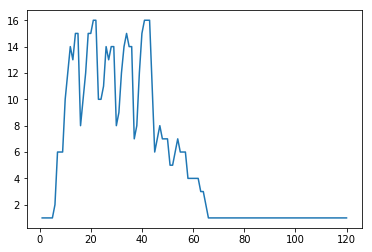

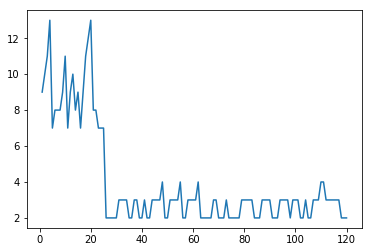

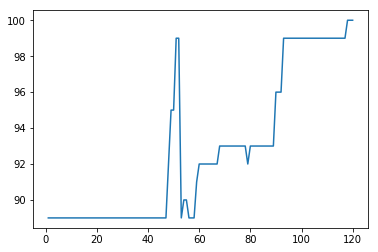

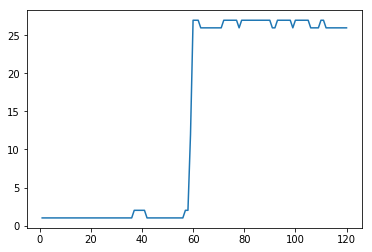

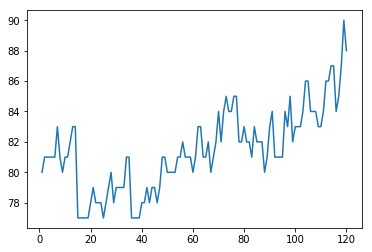

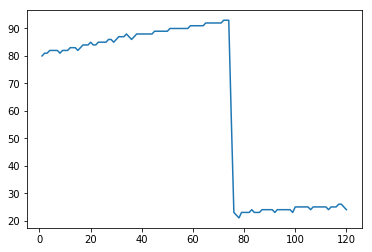

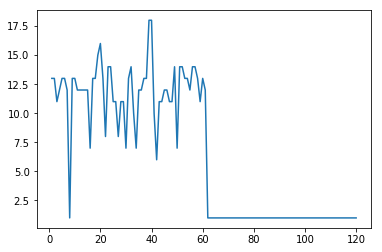

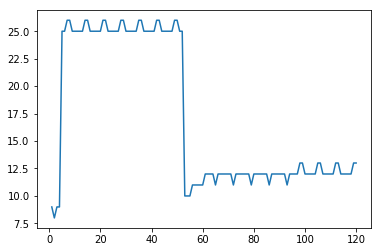

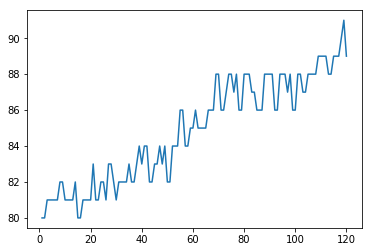

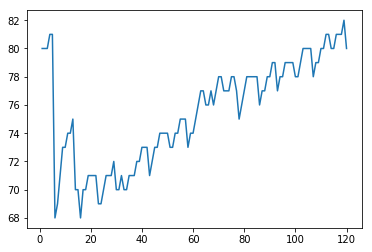

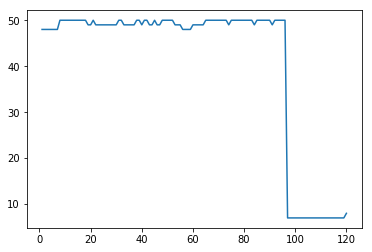

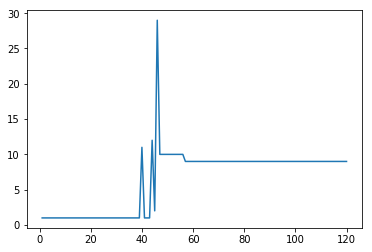

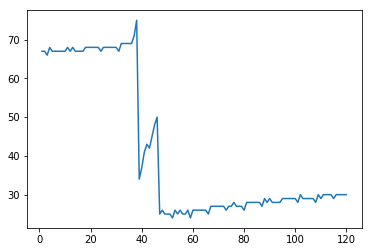

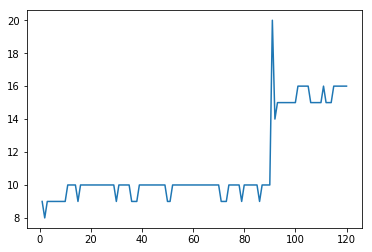

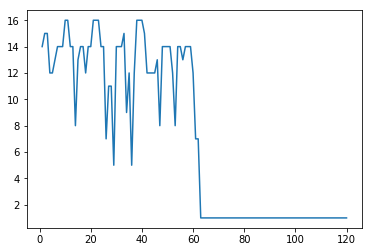

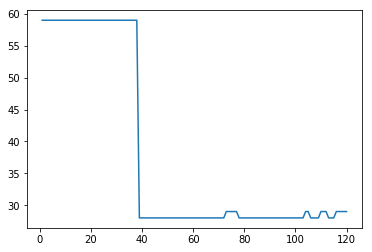

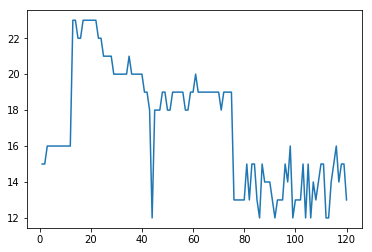

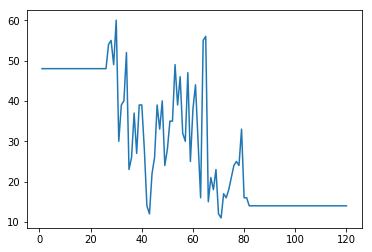

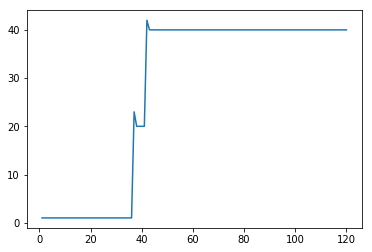

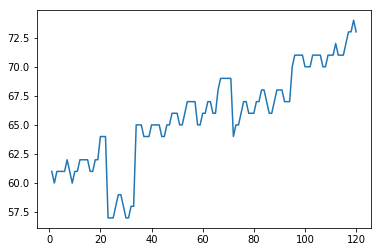

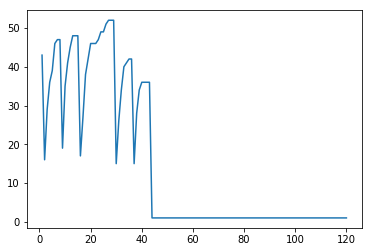

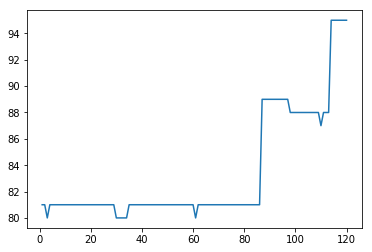

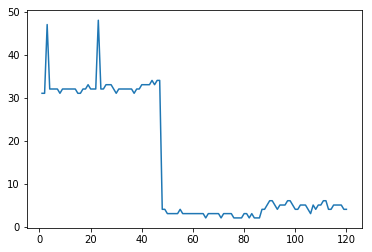

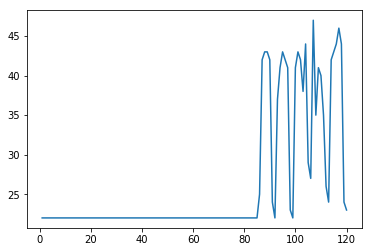

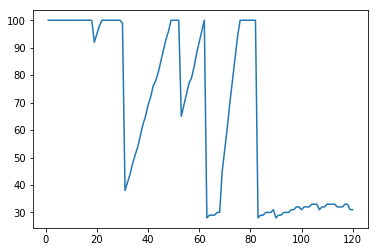

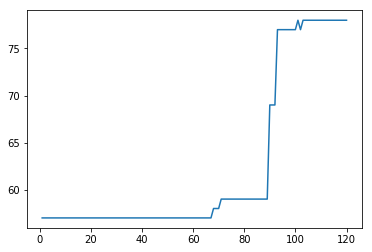

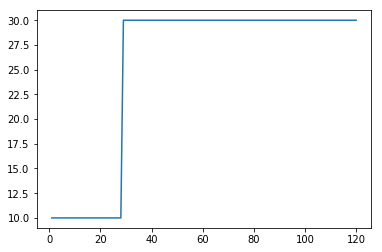

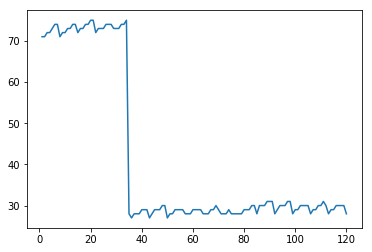

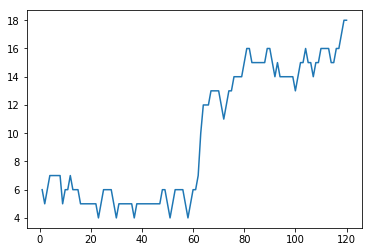

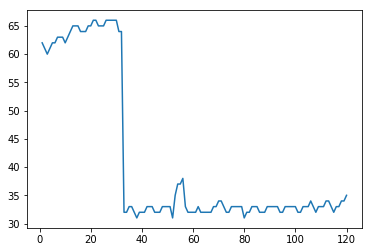

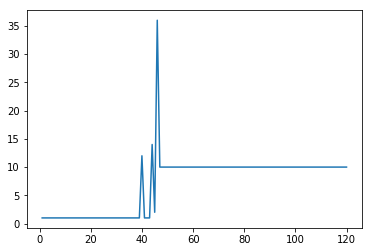

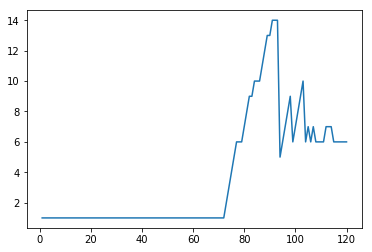

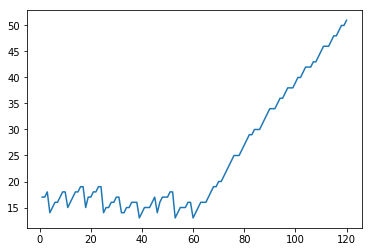

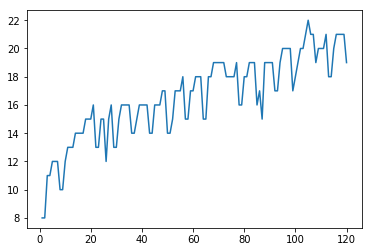

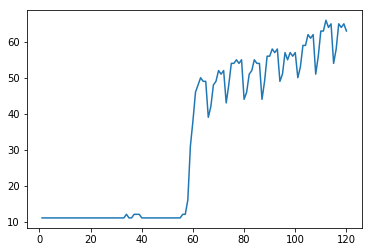

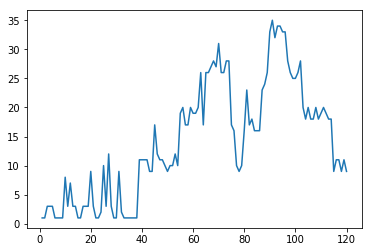

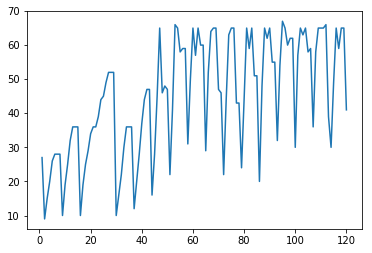

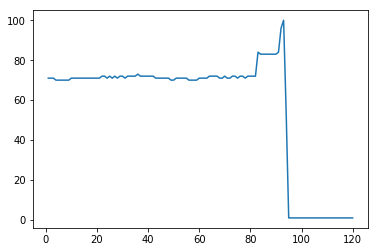

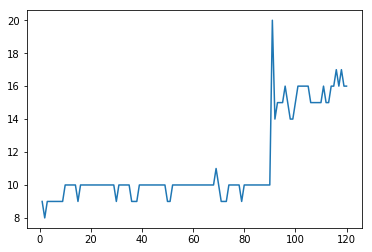

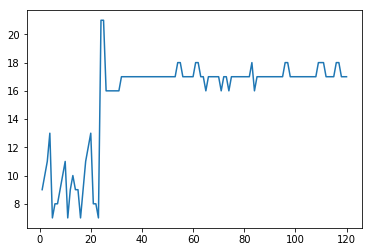

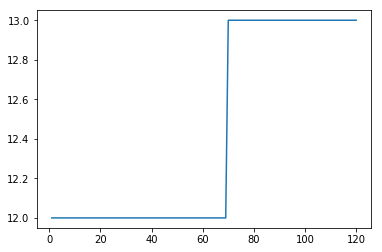

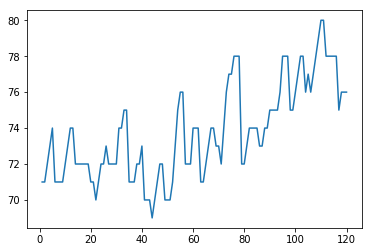

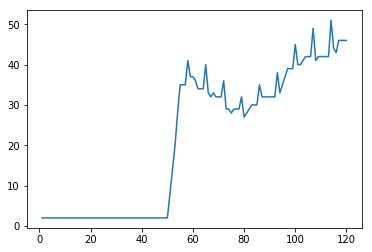

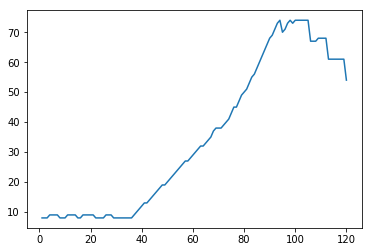

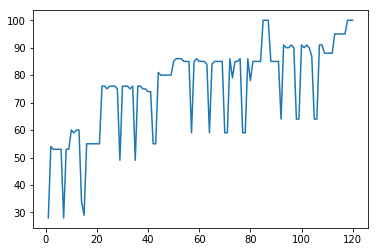

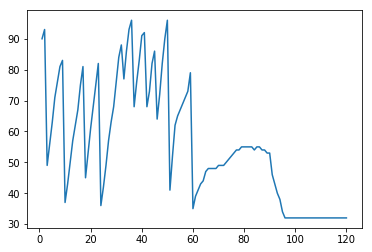

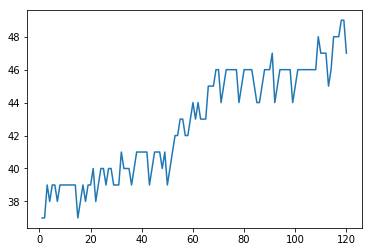

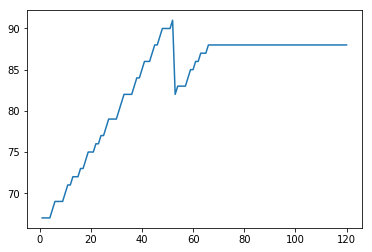

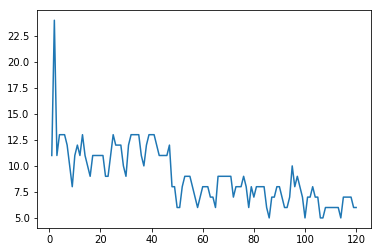

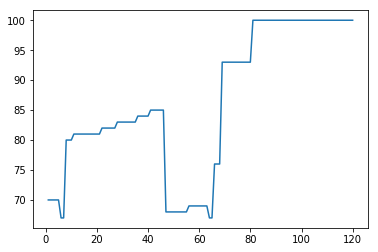

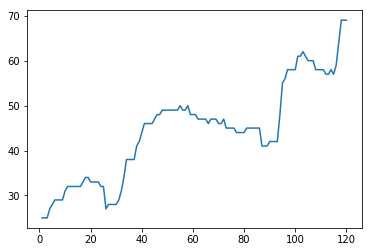

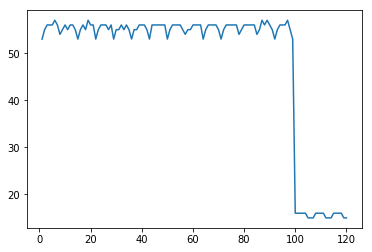

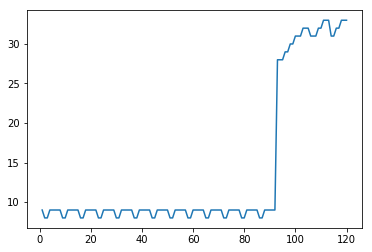

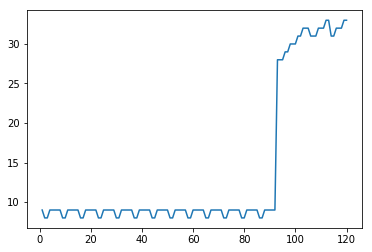

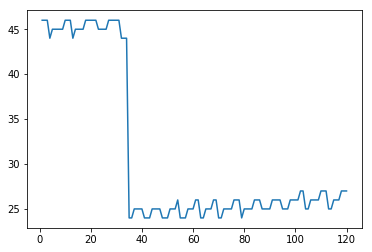

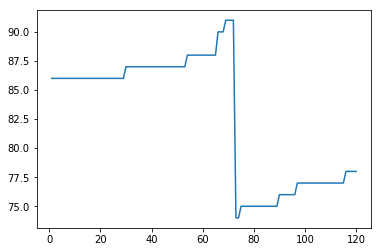

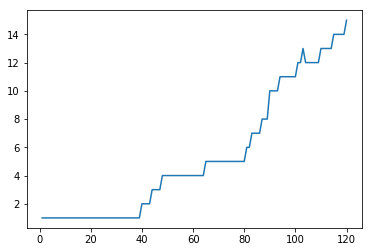

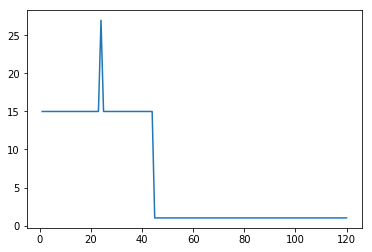

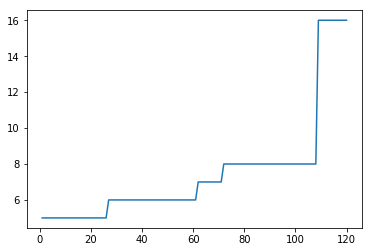

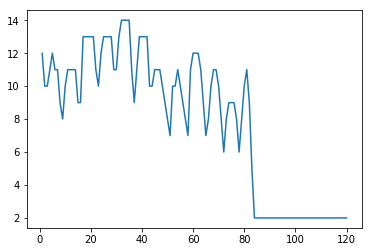

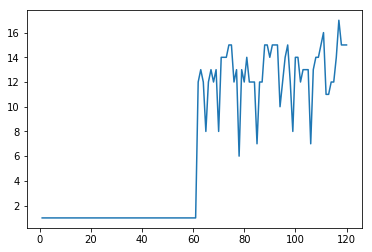

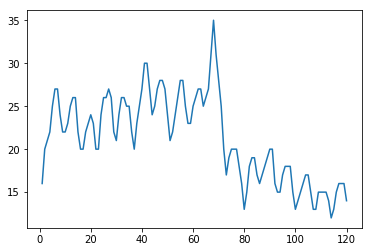

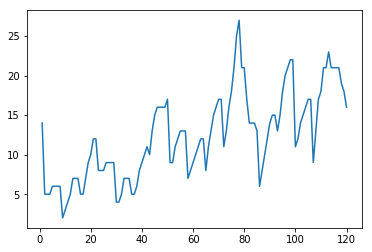

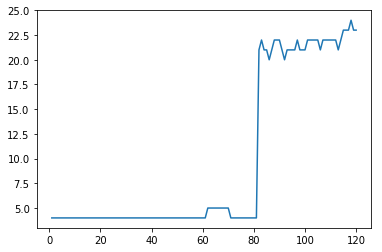

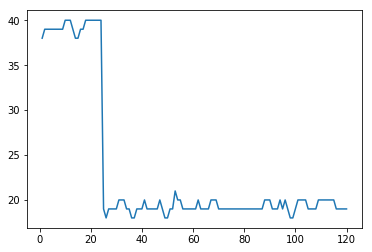

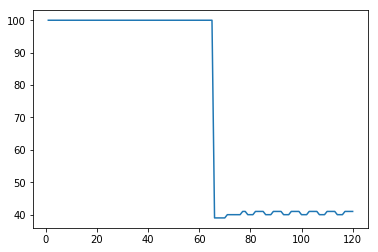

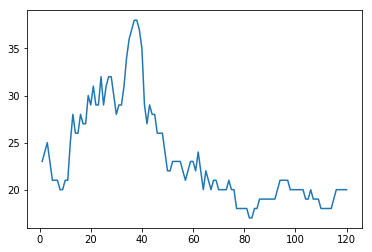

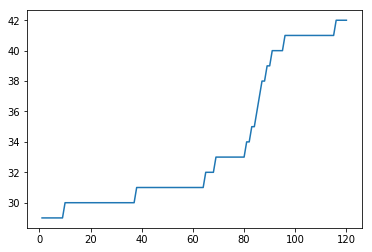

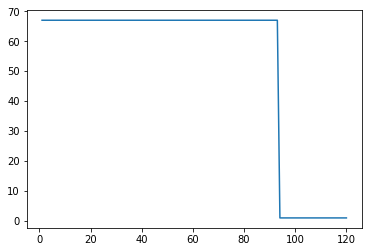

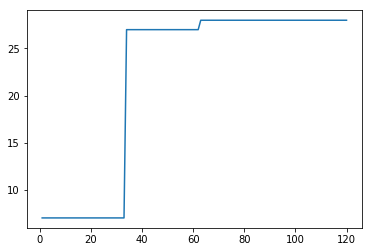

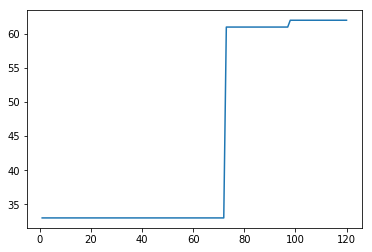

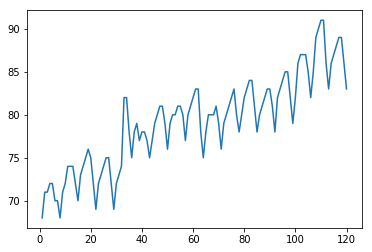

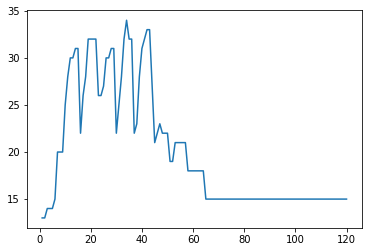

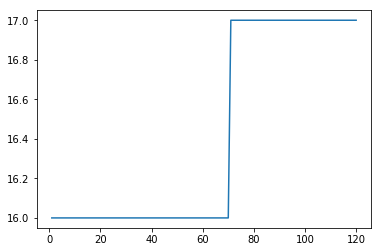

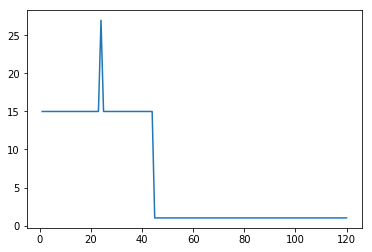

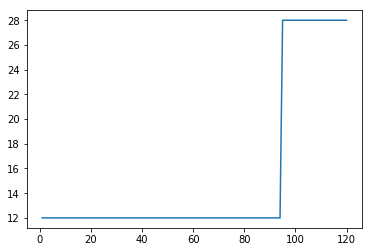

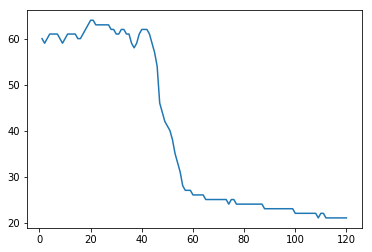

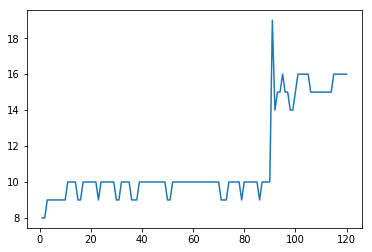

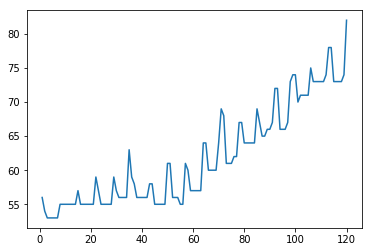

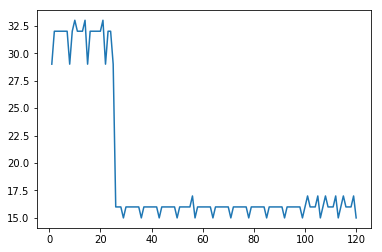

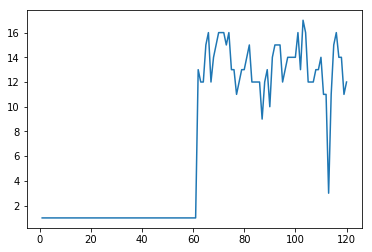

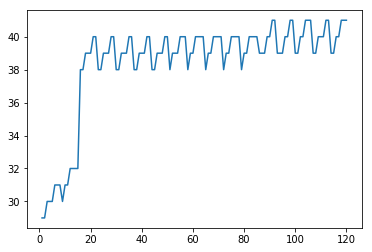

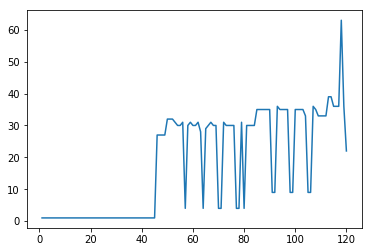

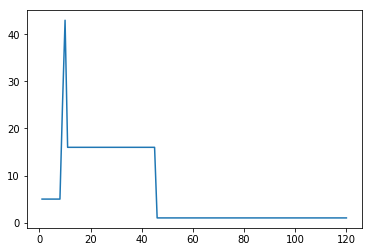

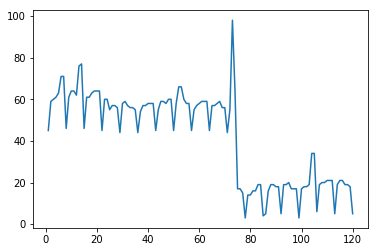

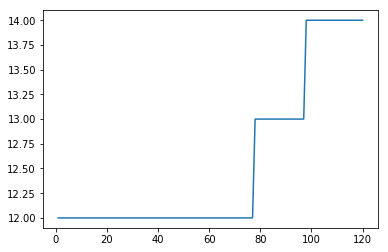

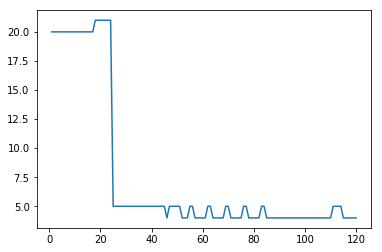

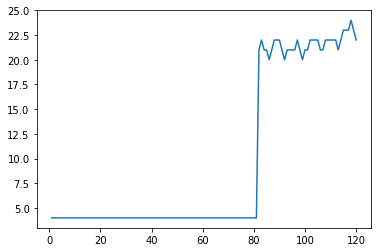

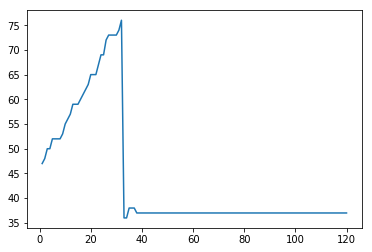

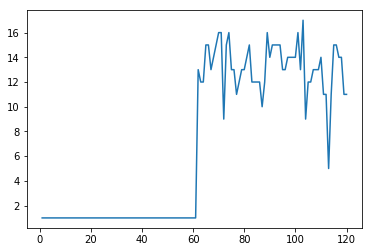

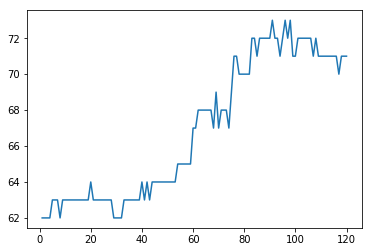

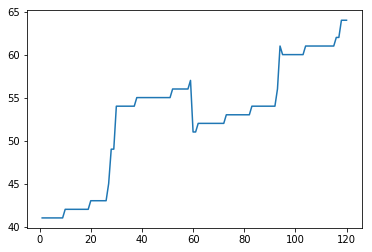

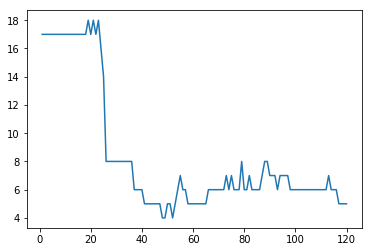

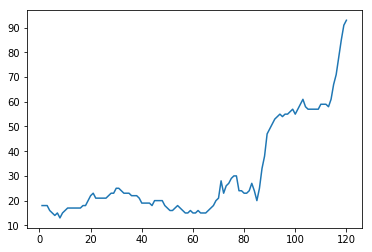

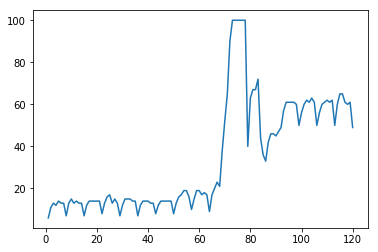

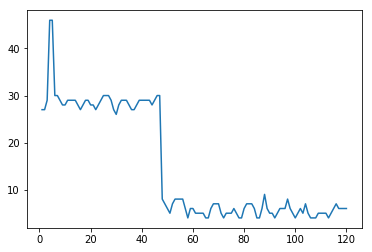

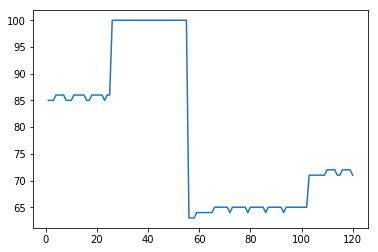

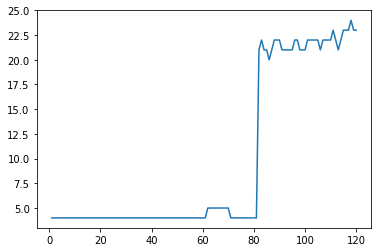

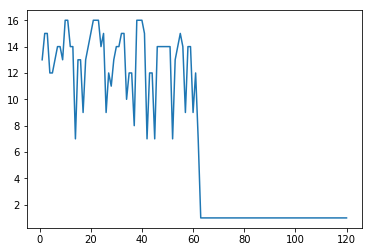

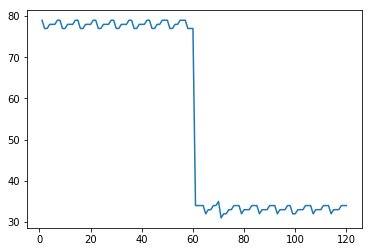

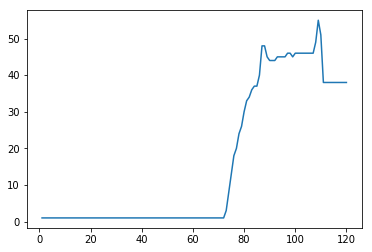

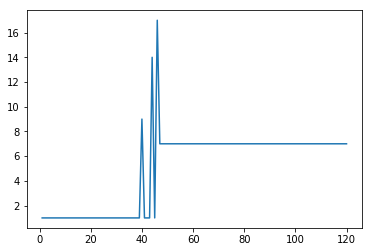

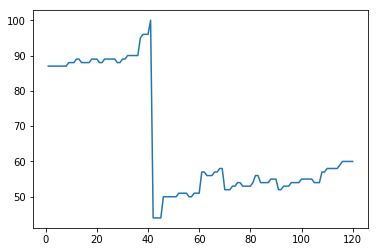

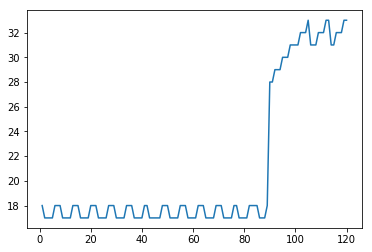

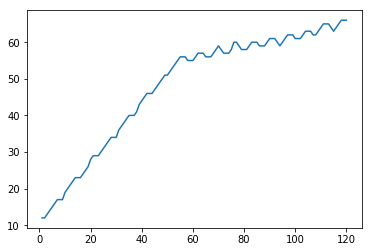

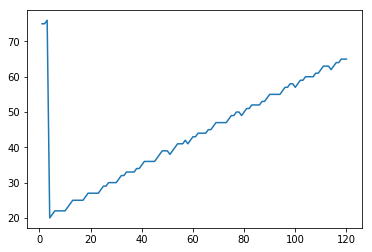

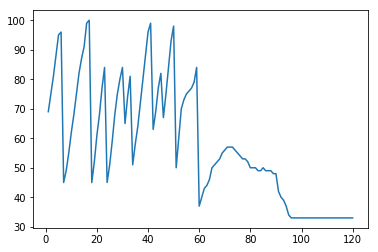

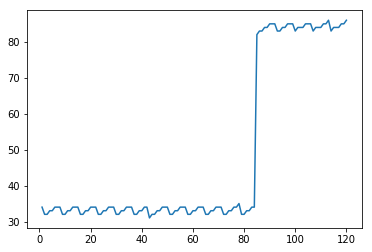

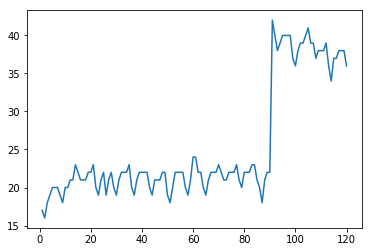

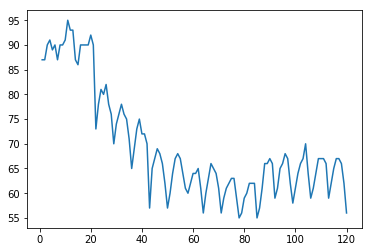

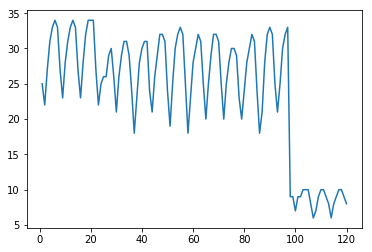

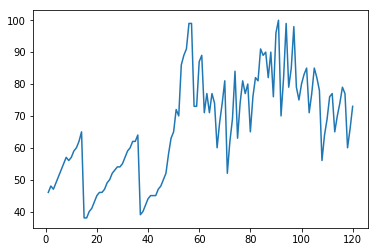

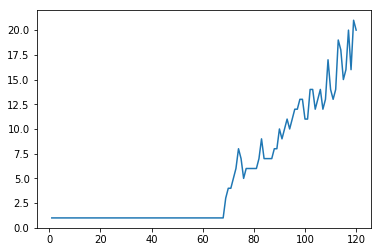

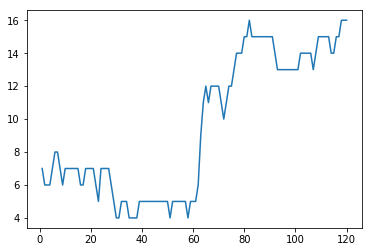

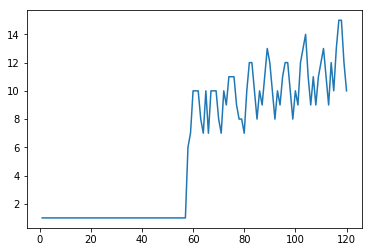

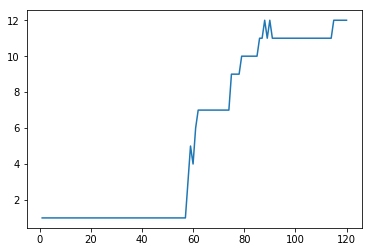

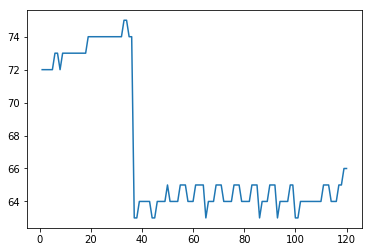

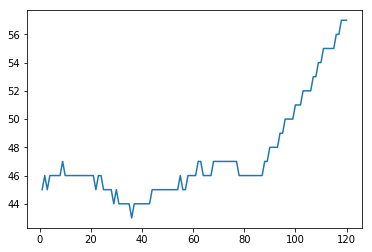

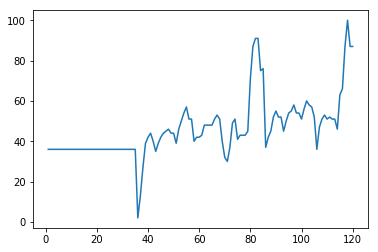

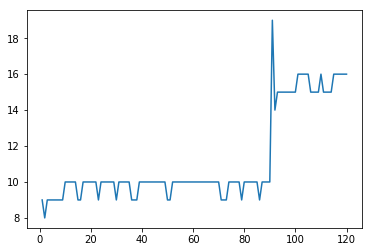

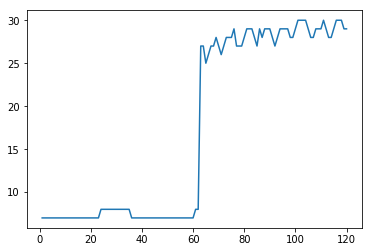

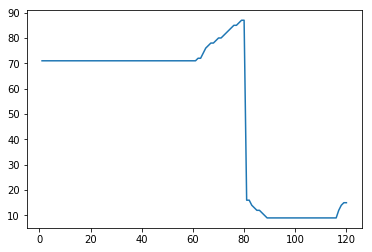

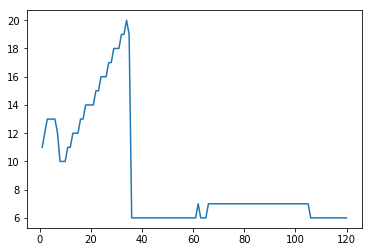

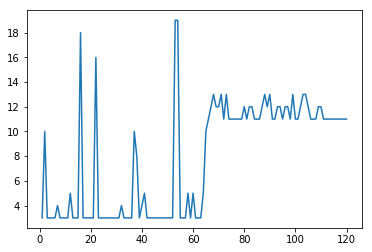

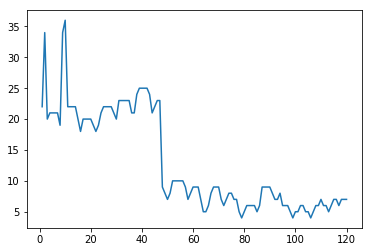

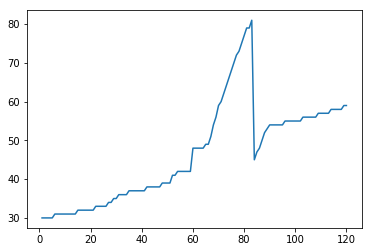

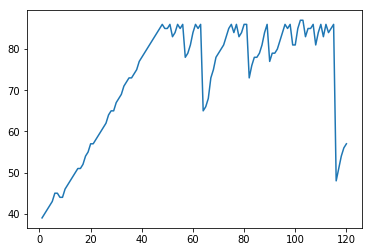

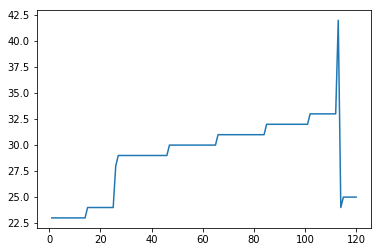

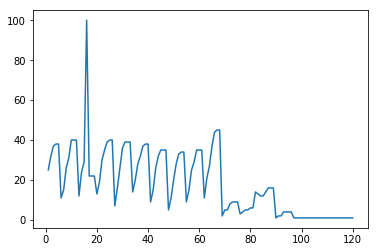

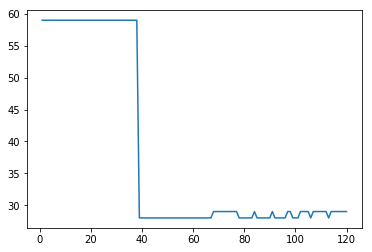

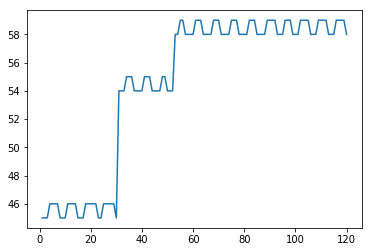

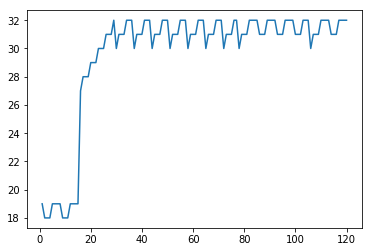

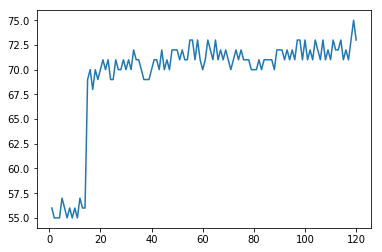

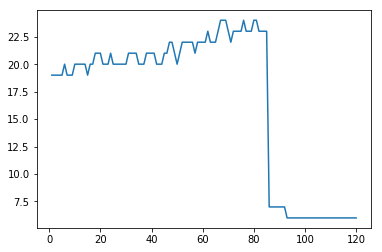

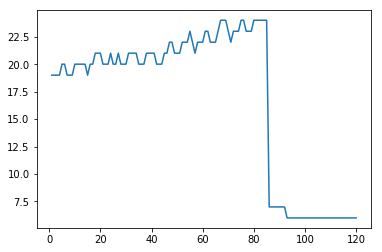

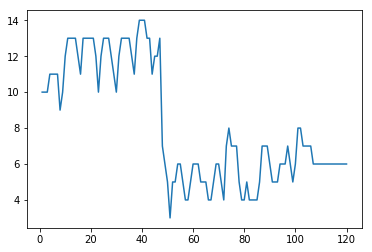

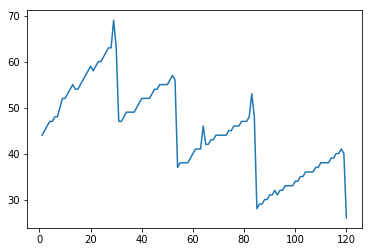

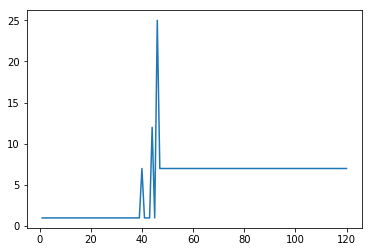

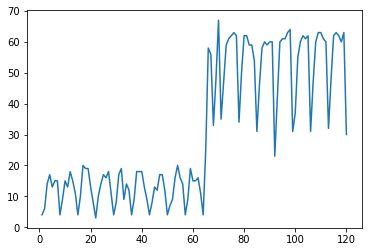

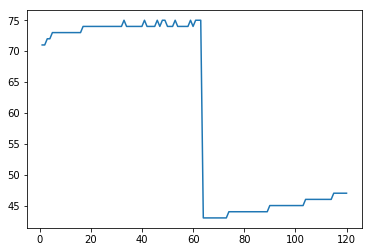

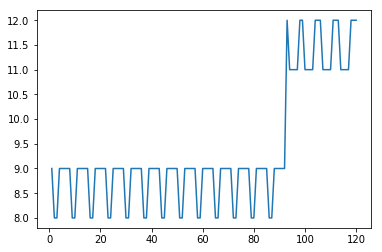

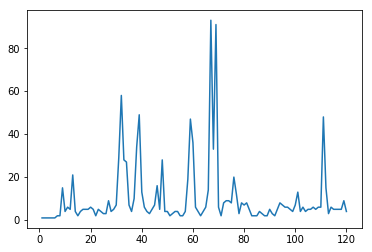

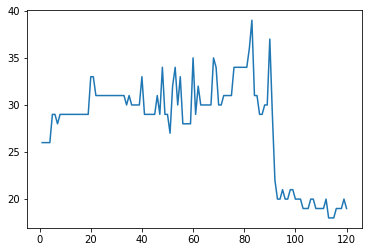

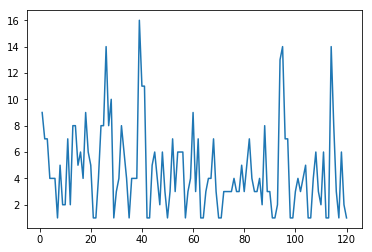

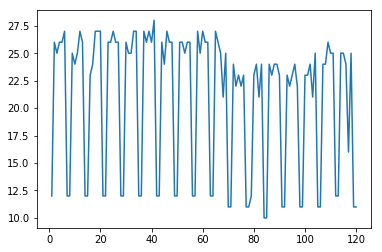

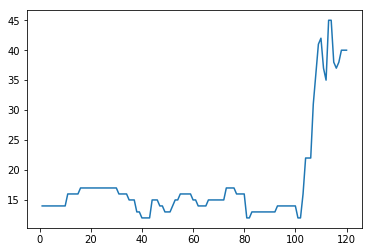

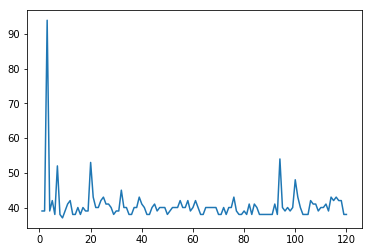

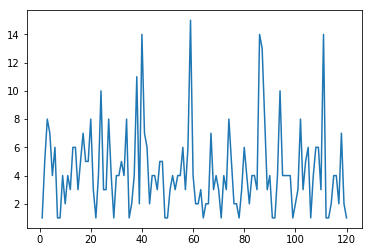

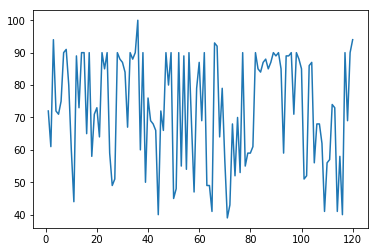

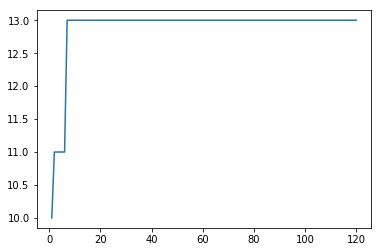

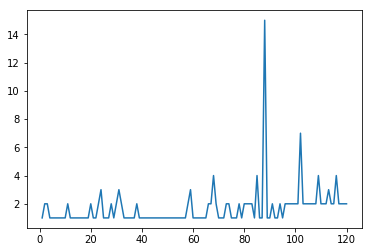

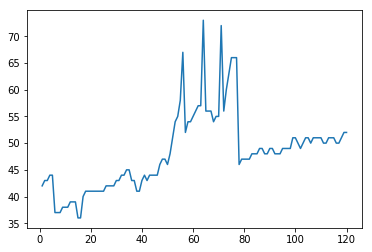

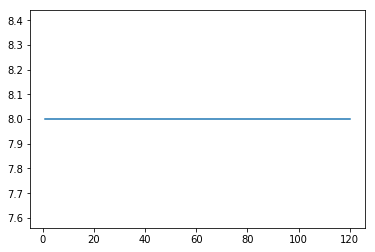

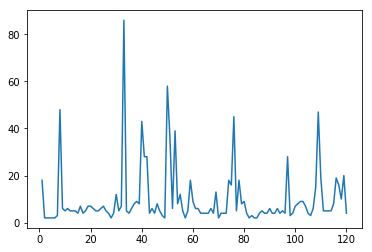

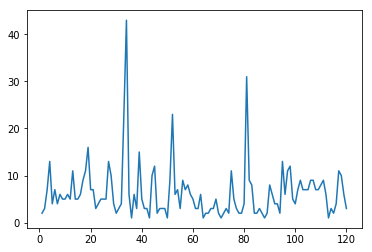

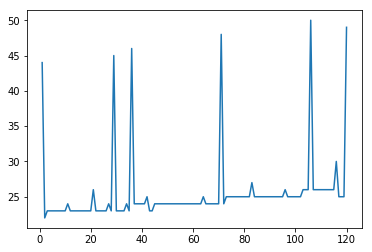

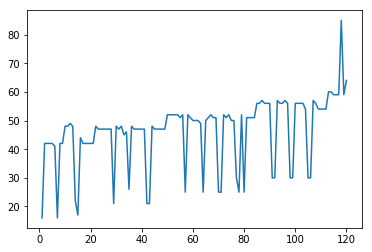

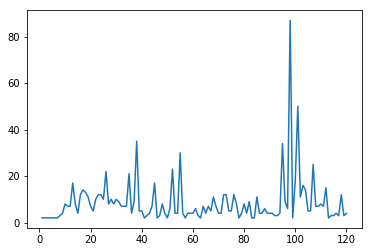

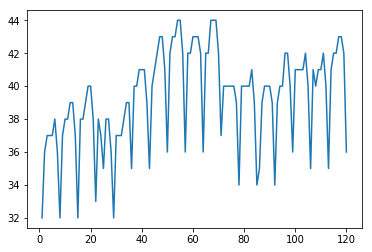

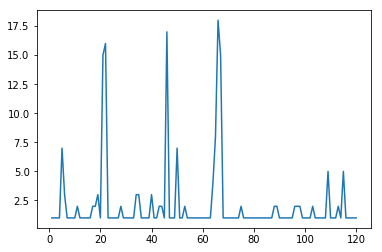

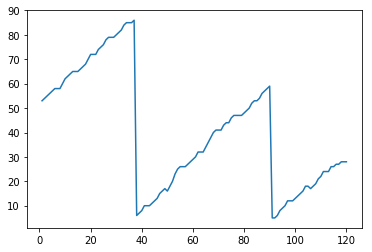

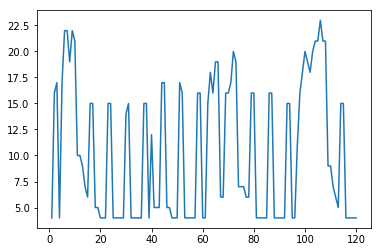

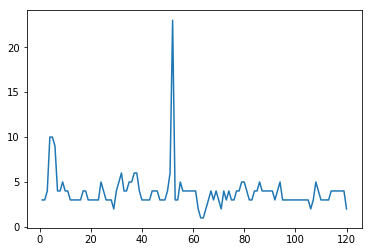

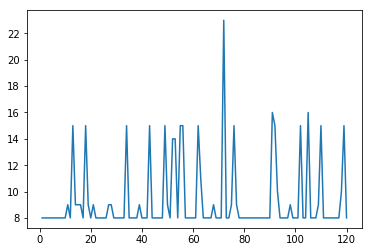

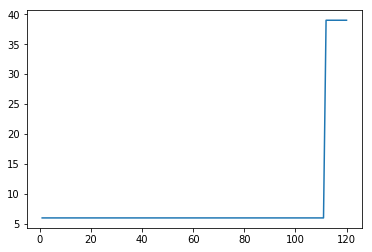

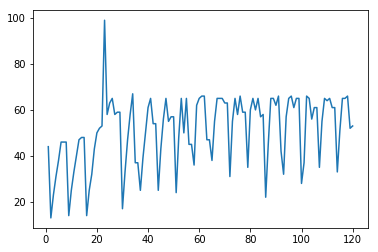

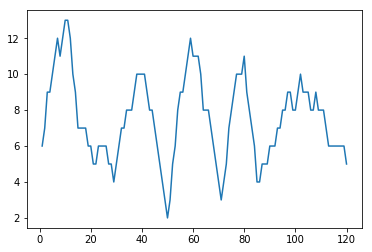

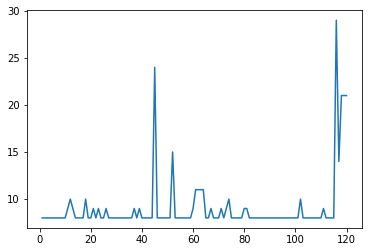

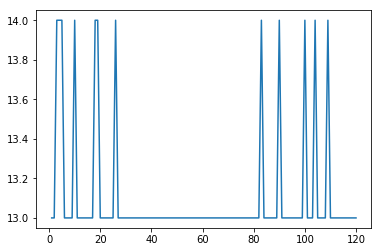

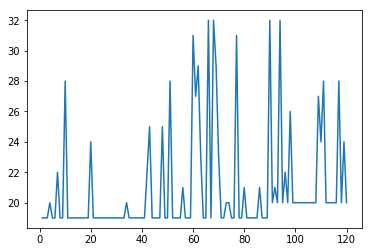

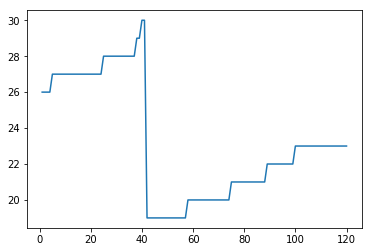

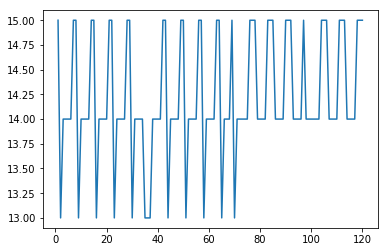

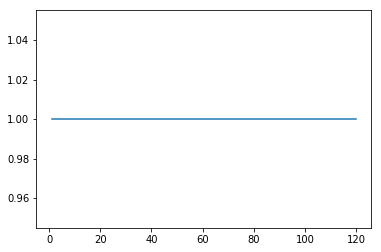

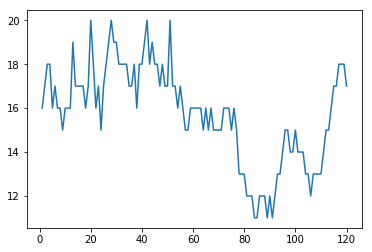

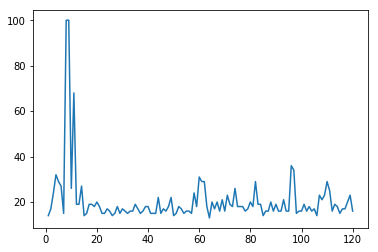

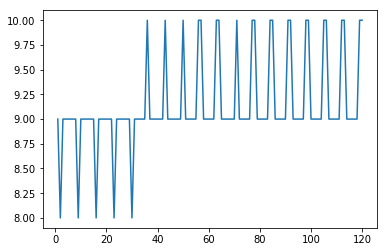

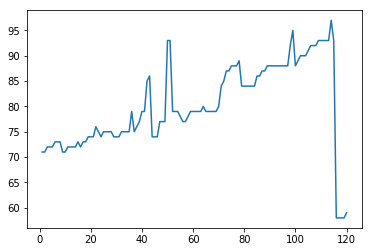

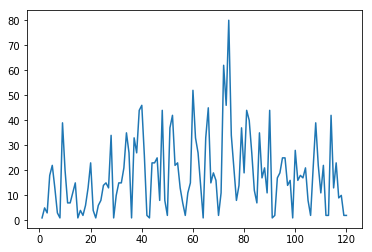

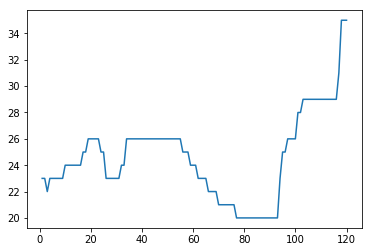

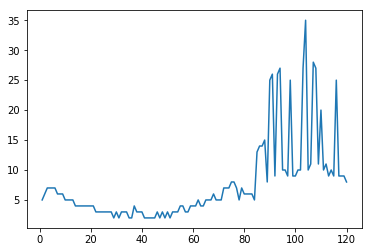

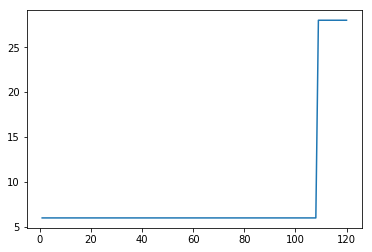

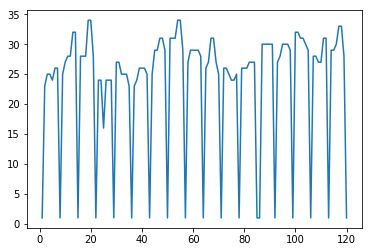

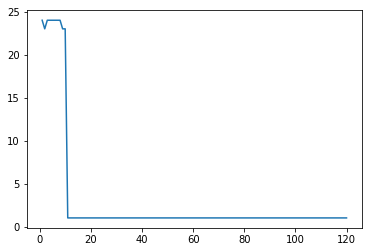

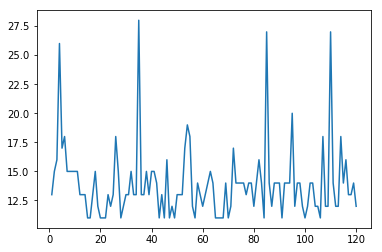

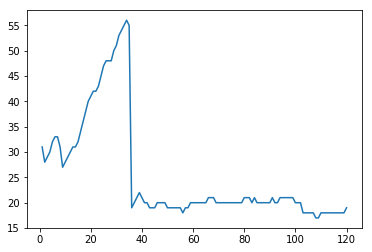

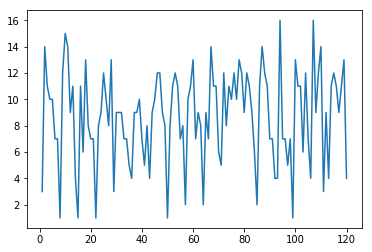

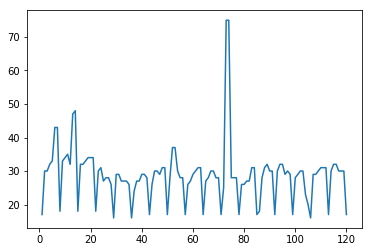

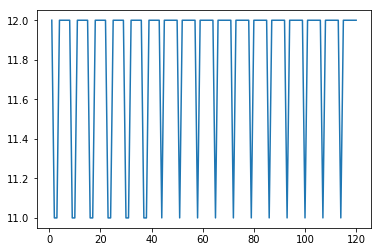

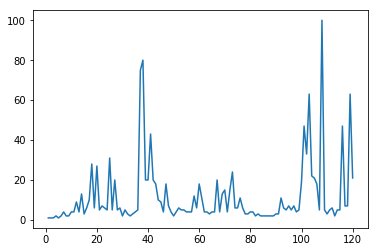

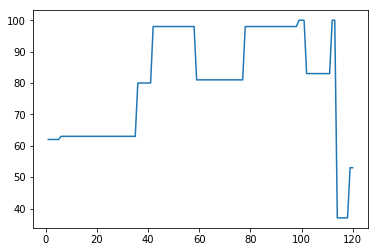

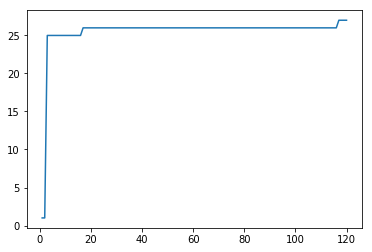

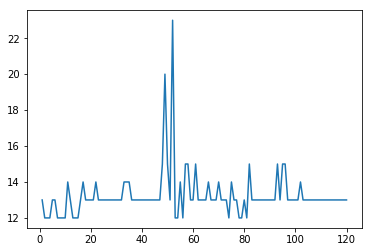

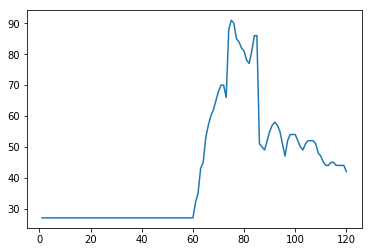

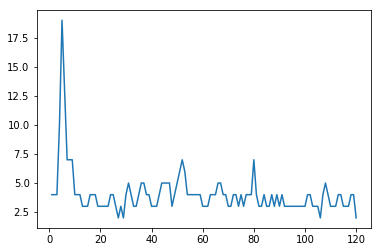

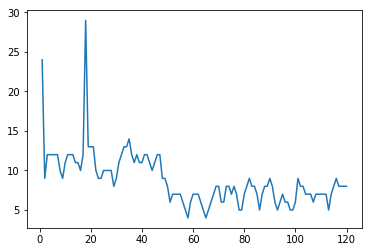

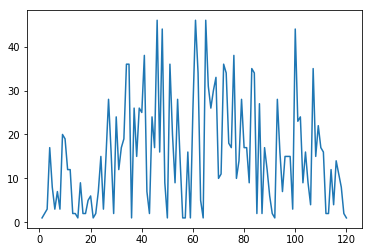

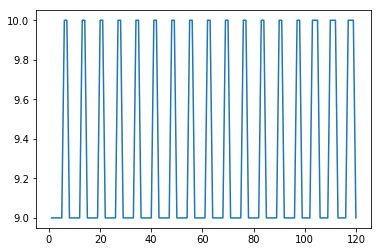

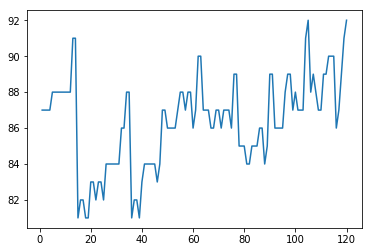

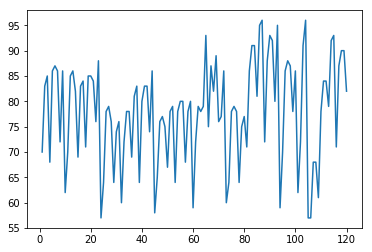

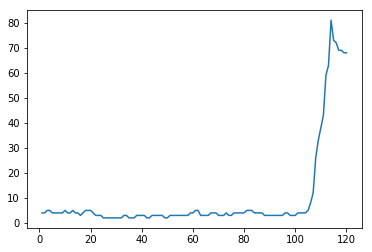

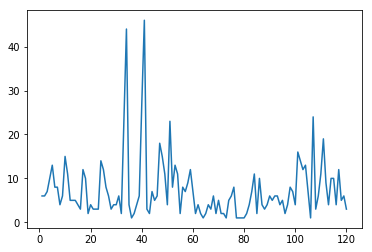

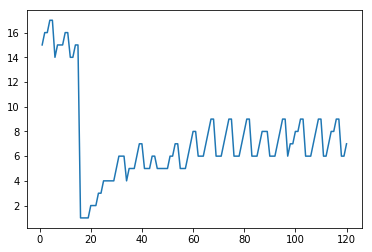

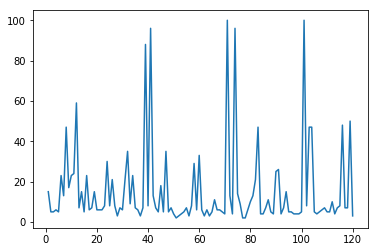

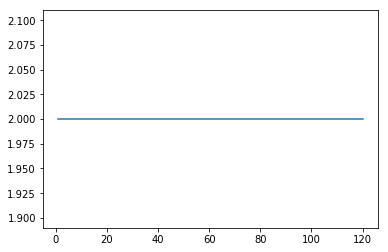

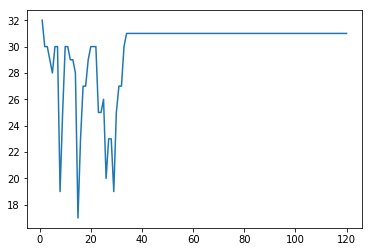

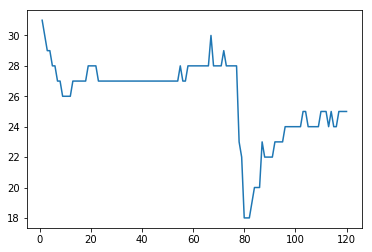

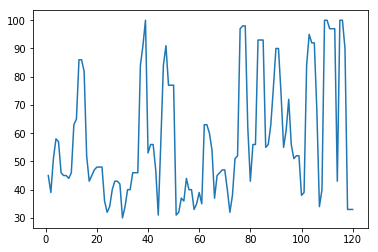

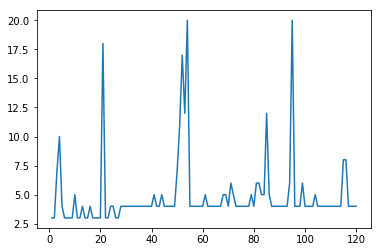

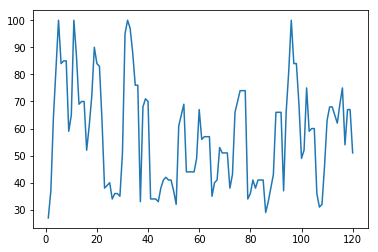

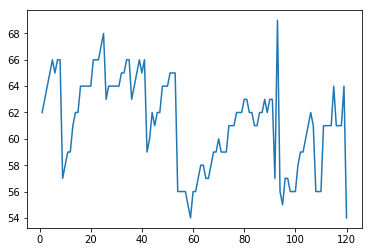

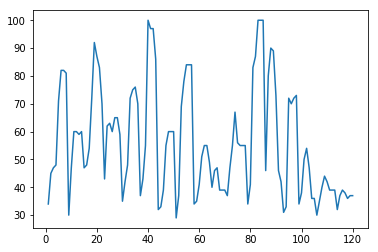

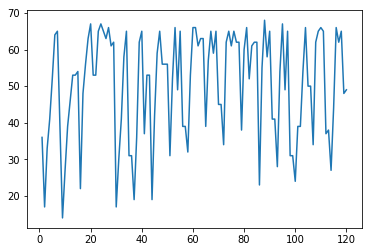

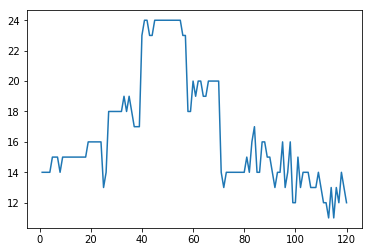

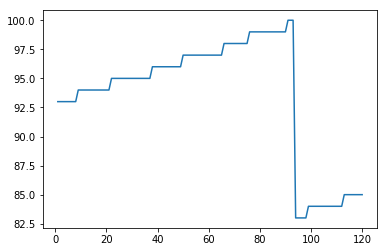

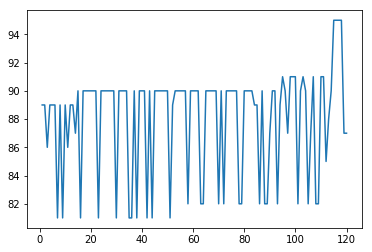

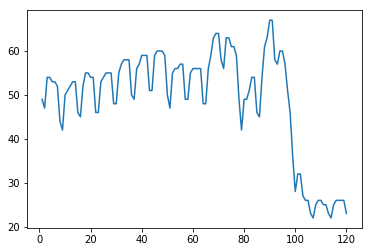

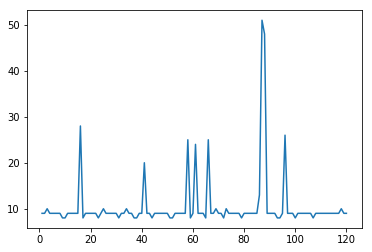

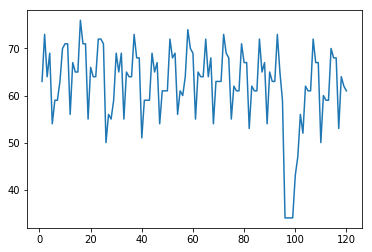

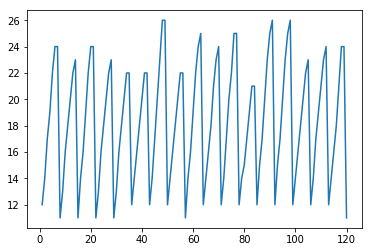

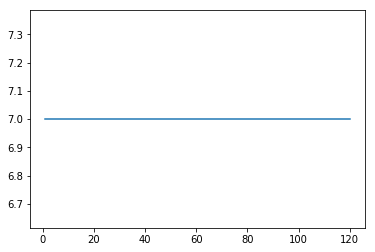

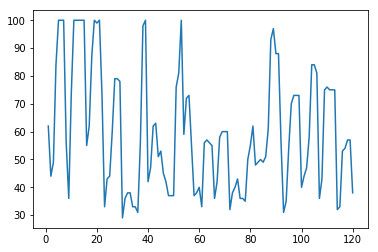

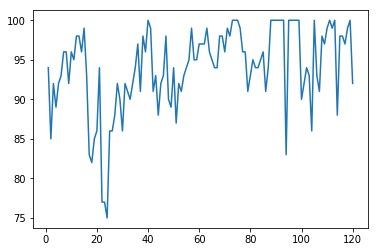

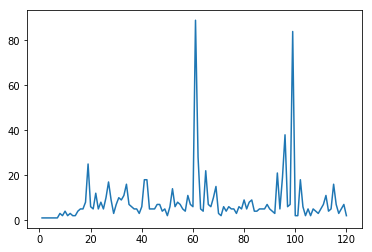

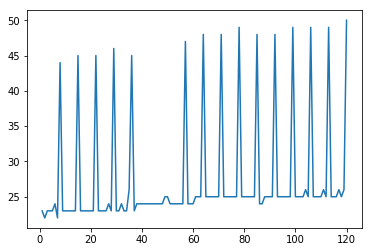

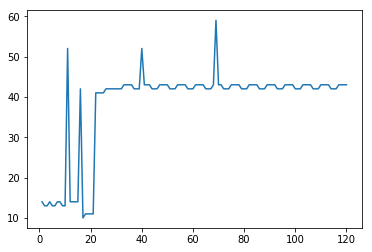

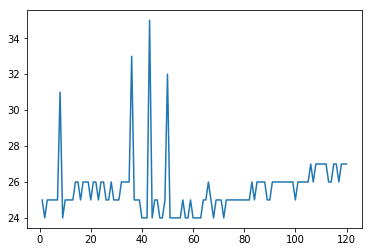

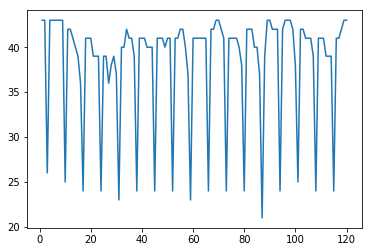

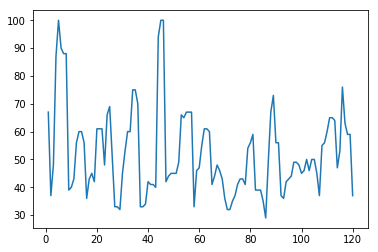

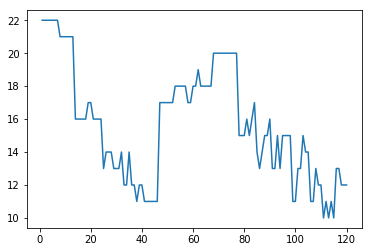

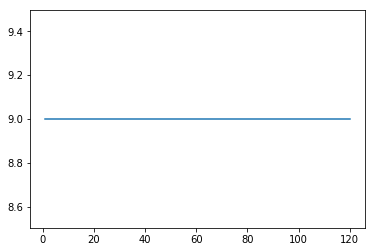

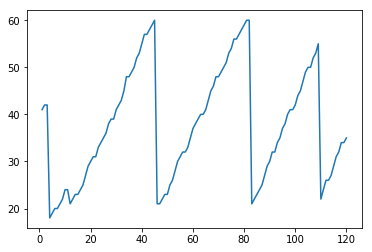

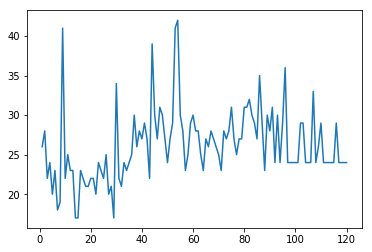

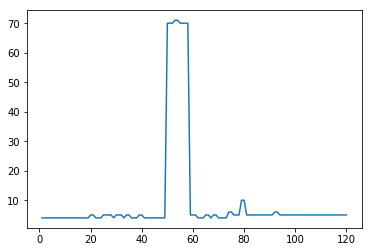

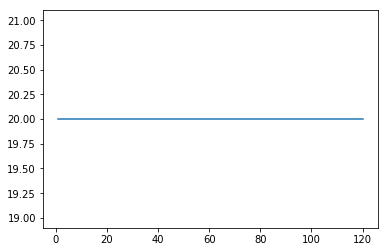

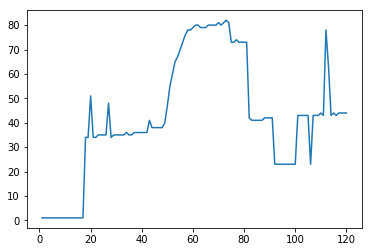

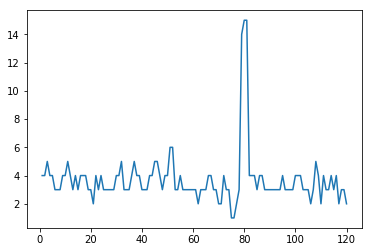

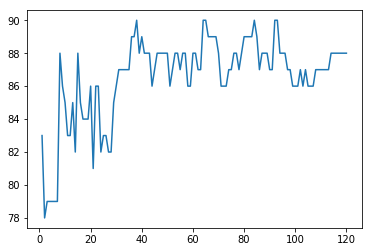

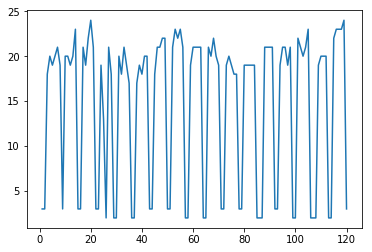

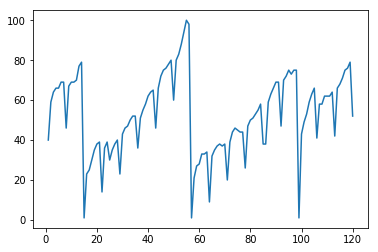

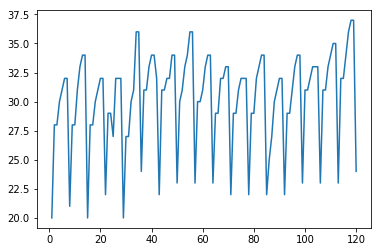

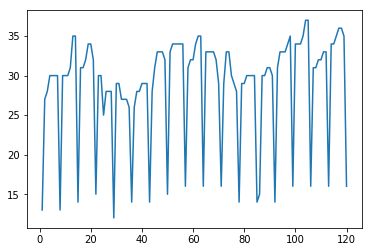

In [11]:
n = 250
for i in range(0,n):
    plt.plot(domA['Timestep'][i*120:(i+1)*120], domA['Usage'][i*120:(i+1)*120])
    plt.show()

In [7]:
import statsmodels.api as sm

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

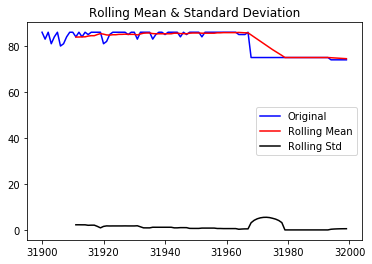

Results of Dickey-Fuller Test:
Test Statistic                 -0.941563
p-value                         0.773977
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (5%)            -2.891516
Critical Value (1%)            -3.498910
Critical Value (10%)           -2.582760
dtype: float64


In [10]:
ts = domA['Usage'][0:100]
test_stationarity(ts)

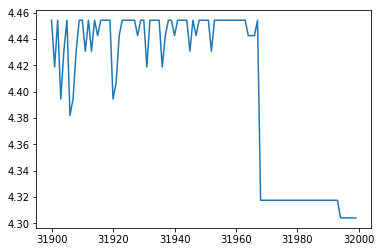

In [11]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

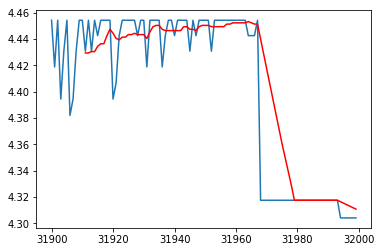

In [12]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

In [13]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

31900         NaN
31901         NaN
31902         NaN
31903         NaN
31904         NaN
31905         NaN
31906         NaN
31907         NaN
31908         NaN
31909         NaN
31910         NaN
31911    0.001321
Name: Usage, dtype: float64

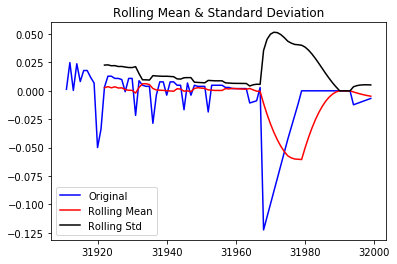

Results of Dickey-Fuller Test:
Test Statistic                 -3.387320
p-value                         0.011399
#Lags Used                      0.000000
Number of Observations Used    88.000000
Critical Value (5%)            -2.894990
Critical Value (1%)            -3.506944
Critical Value (10%)           -2.584615
dtype: float64


In [14]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [15]:
#the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

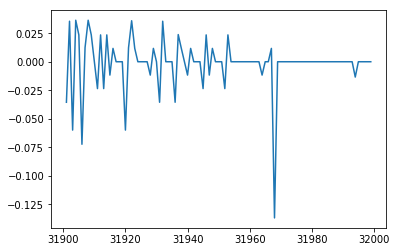

In [16]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

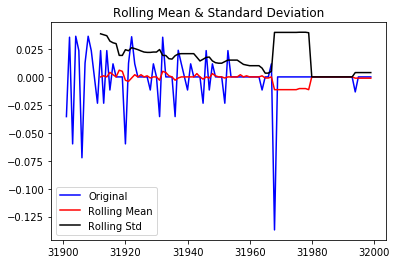

Results of Dickey-Fuller Test:
Test Statistic                -1.309542e+01
p-value                        1.753408e-24
#Lags Used                     0.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (5%)           -2.891516e+00
Critical Value (1%)           -3.498910e+00
Critical Value (10%)          -2.582760e+00
dtype: float64


In [17]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [18]:
#We can also take second or third order differences which might get even better results in certain applications.

In [22]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/akul/.local/lib/python3.5/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/akul/.local/lib/python3.5/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

Text(0.5, 1.0, 'RSS: 0.0445')

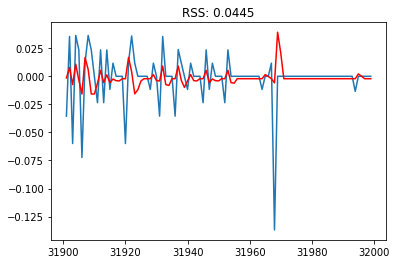

In [23]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0444')

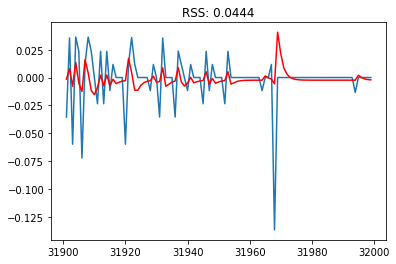

In [24]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0440')

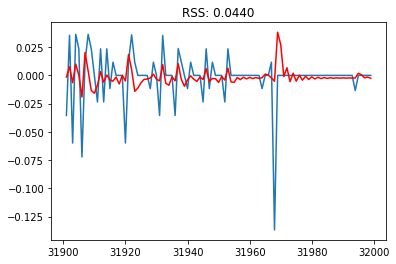

In [25]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [27]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

31901   -0.001443
31902    0.007644
31903   -0.006485
31904    0.010029
31905    0.000121
dtype: float64


In [29]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

31901   -0.001443
31902    0.006201
31903   -0.000283
31904    0.009746
31905    0.009866
dtype: float64


In [35]:
print(ts_log)

31900    4.454347
31901    4.418841
31902    4.454347
31903    4.394449
31904    4.430817
31905    4.454347
31906    4.382027
31907    4.394449
31908    4.430817
31909    4.454347
31910    4.454347
31911    4.430817
31912    4.454347
31913    4.430817
31914    4.454347
31915    4.442651
31916    4.454347
31917    4.454347
31918    4.454347
31919    4.454347
31920    4.394449
31921    4.406719
31922    4.442651
31923    4.454347
31924    4.454347
31925    4.454347
31926    4.454347
31927    4.454347
31928    4.442651
31929    4.454347
           ...   
31970    4.317488
31971    4.317488
31972    4.317488
31973    4.317488
31974    4.317488
31975    4.317488
31976    4.317488
31977    4.317488
31978    4.317488
31979    4.317488
31980    4.317488
31981    4.317488
31982    4.317488
31983    4.317488
31984    4.317488
31985    4.317488
31986    4.317488
31987    4.317488
31988    4.317488
31989    4.317488
31990    4.317488
31991    4.317488
31992    4.317488
31993    4.317488
31994    4

In [36]:
predictions_ARIMA_log = pd.Series(ts_log, index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

31900    4.454347
31901    4.417398
31902    4.460549
31903    4.394166
31904    4.440562
dtype: float64

Text(0.5, 1.0, 'RMSE: 7.4857')

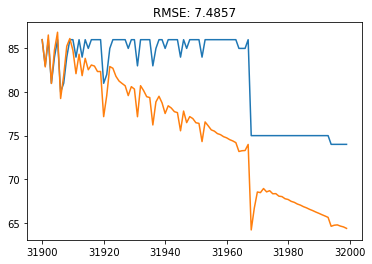

In [37]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [14]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Usage   No. Observations:                   99
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -194.160
Method:                       css-mle   S.D. of innovations              1.717
Date:                Sun, 14 Oct 2018   AIC                            402.319
Time:                        15:09:01   BIC                            420.485
Sample:                             1   HQIC                           409.669
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1127      0.114     -0.993      0.323      -0.335       0.110
ar.L1.D.Usage    -0.3359      0.100     -3.344      0.001      -0.533      -0.139
ar.L2.D.Usage    -0.2035      0.106     

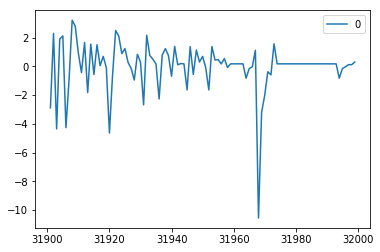

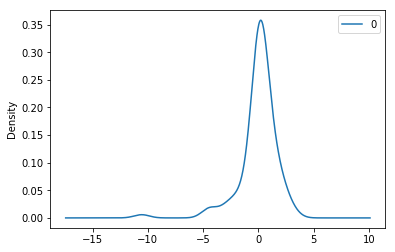

               0
count  99.000000
mean   -0.012363
std     1.732532
min   -10.550280
25%    -0.157105
50%     0.171997
75%     0.719616
max     3.206373


In [15]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

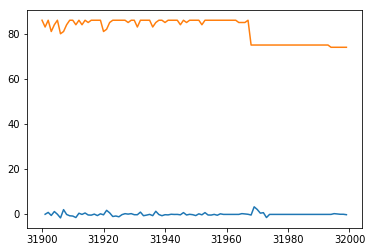

In [29]:
plt.plot(model_fit.fittedvalues)
plt.plot(series)
plt.show()